___

# Capstone Project
### Applied Data Science Capstone by IBM/Coursera
___
# London venues analysis: a case study for opening of new shops


## Table of contents
* [1. Business Problem](#BusinessProblem)
* [2. Assignment](#Assignment)
* [3. Data and Methodology](#Data&Methodology)
* [4. Analysis](#Analysis)
* [5. Results: the appeal index and cluster membership per each borough](#Results)
* [6. Conclusion and Final Comments](#Conclusion)

___

## 1. Business Problem <a name="BusinessProblem"></a>

___

An medium-seized coffee shop franchise - our client - is looking for three suited places in London to open new shops over there.
The four new shops - three "standards" plus one flagship - should be

**a.** well spread over Greater London Area.\
**b.** in zones with a low concentration of competitor shops (competitor = franchise with a number of shops between 3 and 6 in whole Greater London Area).\
**c.** in zones with a proved business resilience (i.e. high business survival rate).\
**d.** in zones with good pop density.\
**e.** the flagship should be placed in a INNER LONDON borough.\
**f.** the other three shops can be placed each of them in one of the three clusters assessed in OUTER Areas.


___

## 2. Assignment <a name="Assignment"></a>

___

The client commissioned to our company a detailed analysis to find out four suited zones to open his shops by fulfilling the requirements listed in the Background.


___

## 3. Data and Methodology <a name="Data&Methodology"></a>

___

* Data Source for Greater London Stats: https://data.london.gov.uk/dataset/london-borough-profiles   ([License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/))
* Foursquare for Greater London Venue Stats.

**Steps**:\
**I.**  The Greater London boroughs will be analyzed and clusterized by taking into account their geographical coordinates: particular focus will be placed on Business Survival Rate, Population Density and Competitors Shop Density.\
**II.** An appeal index by taking into account point **b.**, **c.** and **d.** will be created, the index will be created by weighing:

| FACTORS                   | WEIGHTS |
| :--------------------------:| :--------:|
| CoffeeShop Density per Ha | 45%     |
| Business Survival Index   | 25%     |
| Population Density        | 30%     |


While Business Survival Rate and Population Density can be easily retrieved in the first link, Competitors Shop Density per borough will be assessed by using Foursquare to search for coffee shop in a 3.5 km radius from boroughs center.

Roughly, in the first step the London boroughs will be divided in three clusters while in the second step we will assess the three major indexes per each borough to support the decision where shops should be placed in: the decision will be addressed to the evaluation of an **APPEAL INDEX** calculated as weighted average of three major indexes.

The **APPEAL INDEX** is meant as *"the higher, the better"*: <u>**the best performing borough per each cluster will be the winner**</u>.


___

## 4. Analysis <a name="Analysis"></a>

___

### 4.a **Import all needed Python Modules**

In [1]:
!pip install lxml
!pip install geopy
!pip install folium
!pip install geopy

import numpy as np
import scipy as sp

import pandas as pd
from lxml import etree

import folium as fo
from geopy.geocoders import Nominatim
import requests as rq

from sklearn.cluster import KMeans

import matplotlib as mpl
import seaborn as sns

pd.set_option("precision", 5)

### 4.b **Import and Show London boroughs selected data**

In [2]:
# Source file saved locally
LondonDatasetPath = 'C:/Users/Marco/Desktop/london-borough-profiles.csv'

# Import selected columns
RequiredCols = ['Code', 'Area_name','Inner/_Outer_London','Inland_Area_(Hectares)','Population_density_(per_hectare)_2017','Average_Age,_2017', \
                'Proportion_of_population_of_working-age,_2015', 'Two-year_business_survival_rates_(started_in_2013)']

# Read Dataset
LondonDataset = pd.read_csv(LondonDatasetPath, usecols=RequiredCols)

# Some Rows are general stats (e.g. whole England\United Kingdom stats), they have to be dropped out
LondonDataset.dropna(how='any',subset=['Inner/_Outer_London'],inplace=True)

# Print total number of boroughs in London
print('\n{} boroughs found in Greater London Area.\n'.format(LondonDataset.shape[0]))

# Show Dataset
LondonDataset


33 boroughs found in Greater London Area.



,Code,Area_name,Inner/_Outer_London,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_of_working-age,_2015",Two-year_business_survival_rates_(started_in_2013)
0,E09000001,City of London,Inner London,290,30.3,43.2,73.1,64.3
1,E09000002,Barking and Dagenham,Outer London,"3,611",57.9,32.9,63.1,73.0
2,E09000003,Barnet,Outer London,"8,675",44.9,37.3,64.9,73.8
3,E09000004,Bexley,Outer London,"6,058",40.3,39.0,62.9,73.5
4,E09000005,Brent,Outer London,"4,323",76.8,35.6,67.8,74.4
5,E09000006,Bromley,Outer London,"15,013",21.8,40.2,62.6,78.6
6,E09000007,Camden,Inner London,"2,179",111.3,36.4,71.0,73.6
7,E09000008,Croydon,Outer London,"8,650",44.7,37.0,64.9,75.3
8,E09000009,Ealing,Outer London,"5,554",63.3,36.2,66.8,75.8
9,E09000010,Enfield,Outer London,"8,083",41.2,36.3,64.4,74.2


### 4.c **Search for and Show Geographic Coordinates of each borough**

In [3]:
GeoDataDict = {'Area_name': [],'Extended_name': [],'Lat': [],'Lon': []}
for idx, Area in LondonDataset.iterrows():
    print('Checking "{}"\n'.format(Area['Area_name']))
    geolocator = Nominatim(user_agent="LondonAreas")
    if not Area['Area_name'] in ['Westminster', 'City of London'] :
        location = geolocator.geocode('London borough of {}'.format(Area['Area_name']))
    elif Area['Area_name'] in ['Westminster', 'City of London']:
        location = geolocator.geocode('City of {}'.format(Area['Area_name']))        
    print('\t{}: {}\n\tLat={:+4.3f}, Lon={:+4.3f}\n'.format(idx,location.address,location.latitude,location.longitude))
    GeoDataDict['Area_name'].append(Area['Area_name'])
    GeoDataDict['Extended_name'].append(location.address)
    GeoDataDict['Lat'].append(location.latitude)
    GeoDataDict['Lon'].append(location.longitude)
    
GeoData = pd.DataFrame(data=GeoDataDict)

Checking "City of London"

	0: City of London, Greater London, England, United Kingdom
	Lat=+51.516, Lon=-0.092

Checking "Barking and Dagenham"

	1: London Borough of Barking and Dagenham, London, Greater London, England, United Kingdom
	Lat=+51.554, Lon=+0.151

Checking "Barnet"

	2: London Borough of Barnet, London, Greater London, England, United Kingdom
	Lat=+51.613, Lon=-0.211

Checking "Bexley"

	3: London Borough of Bexley, London, Greater London, England, United Kingdom
	Lat=+51.462, Lon=+0.146

Checking "Brent"

	4: London Borough of Brent, London, Greater London, England, United Kingdom
	Lat=+51.564, Lon=-0.276

Checking "Bromley"

	5: London Borough of Bromley, London, Greater London, England, United Kingdom
	Lat=+51.367, Lon=+0.062

Checking "Camden"

	6: London Borough of Camden, London, Greater London, England, United Kingdom
	Lat=+51.543, Lon=-0.163

Checking "Croydon"

	7: London Borough of Croydon, London, Greater London, England, United Kingdom
	Lat=+51.355, Lon=-0.0

### 4.d **Create an extended dataset (Borough info and Geo Coordinates) and show the boroughs in a map**

In [4]:
ExtendedLondonDataset = LondonDataset.merge(GeoData)
columns = ExtendedLondonDataset.columns.to_list()
columns = columns[0:3]+columns[-3:]+columns[3:-3]
ExtendedLondonDataset = ExtendedLondonDataset[columns]

In [5]:
location = geolocator.geocode('London')
print('\nCenter map on: {}\n'.format(location.address))
map_london = fo.Map(location=[location.latitude, location.longitude], zoom_start=11)

print('Red marker\t>>\tInner London\nBlue Marker\t>>\tOuter London.\n')
# add markers to map
for lat, lng, area_name,ext, inout in zip(ExtendedLondonDataset['Lat'], ExtendedLondonDataset['Lon'], ExtendedLondonDataset['Area_name'], ExtendedLondonDataset['Extended_name'], ExtendedLondonDataset['Inner/_Outer_London']):
    if inout=='Inner London':
        col='red'
    elif inout=='Outer London':
        col='blue'
    label = '{}'.format(area_name)
    label = fo.Popup(label, parse_html=True)
    fo.Marker(
        [lat, lng],
        popup=label,
        tooltip=ext,
        icon=fo.Icon(color=col, icon='info-sign')).add_to(map_london)  
    
map_london


Center map on: London, Greater London, England, United Kingdom

Red marker	>>	Inner London
Blue Marker	>>	Outer London.



### 4.e **Use Foursquare to retrieve information regarding Coffee Shops in each borough (3.5 km Radius)**

In [6]:
CLIENT_ID = 'xxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxx' # your Foursquare Secret
ACCESS_TOKEN = 'xxxxx' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

In [7]:
def getNearbyVenues(names, radius, queryshop):
        
    venues_list=[]
    for name in names:
        
        near = '{}, London'.format(name)
                
        # create the API request URL        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            near,
            radius, 
            LIMIT,
            queryshop)        
            
        # make the GET request
        results = rq.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area_name', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
london_venues = getNearbyVenues(names=ExtendedLondonDataset['Area_name'],
                                   radius=3500,
                                   queryshop='Coffee Shop')

In [9]:
print('\nA total of {} coffee shops found in the {} boroughs.\nA sample is shown below.\n'.format(london_venues.shape[0], LondonDataset.shape[0]))
london_venues


A total of 981 coffee shops found in the 33 boroughs.
A sample is shown below.



,Area_name,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,WA Cafe,51.51101,-0.12661,Café
1,City of London,Monmouth Coffee Company,51.51431,-0.12682,Coffee Shop
2,City of London,Coffee Island,51.51245,-0.12718,Coffee Shop
3,City of London,Lundenwic,51.51282,-0.11834,Coffee Shop
4,City of London,% Arabica,51.51173,-0.12405,Coffee Shop
...,...,...,...,...,...
976,Westminster,Hagen,51.50982,-0.13781,Coffee Shop
977,Westminster,The Roasting,51.49136,-0.13896,Coffee Shop
978,Westminster,Catalyst Cafe,51.51970,-0.11205,Coffee Shop
979,Westminster,Covent Garden Grind,51.51100,-0.12253,Coffee Shop


### 4.f **Show all franchise with more than three shops in Greater London Area**


Show all franchise with more than 3 shops in Greater London Area.


Costa Coffee               129
Starbucks                   45
Caffè Nero                  37
Wild Bean Cafe               8
Harris + Hoole               8
The Gentlemen Baristas       7
Monmouth Coffee Company      6
Patisserie Valerie           6
EL&N                         5
FCB Coffee                   4
The Watch House              4
L'ETO Caffè                  4
The Press Room               4
Name: Venue, dtype: int64




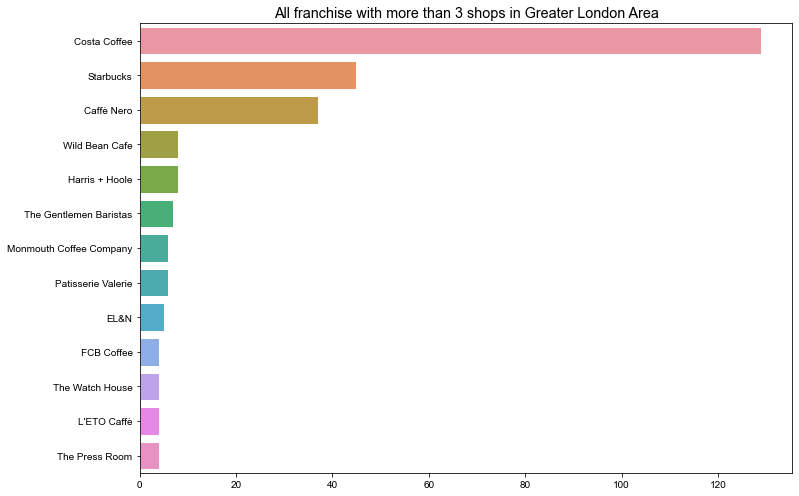

In [10]:
Stats = london_venues['Venue'].value_counts()
print('\nShow all franchise with more than 3 shops in Greater London Area.')
fig, ax = mpl.pyplot.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_theme(style="darkgrid")
sns.barplot(y=Stats[Stats>3].index, x=Stats[Stats>3].values, orient='h', ax=ax)
sns.set(font_scale=1.2)
ax.set_title('All franchise with more than 3 shops in Greater London Area')
print('\n')
print(Stats[Stats>3])
print('\n')


In [11]:
CoffeeShopsStats = Stats[Stats.isin(range(3,7))]
print('Total number of competitors shops in Greater London Area is {}.'.format(CoffeeShopsStats.sum()))


Total number of competitors shops in Greater London Area is 135.


In [12]:
print('The number of shops per each competitor:')
CoffeeShopsStats


The number of shops per each competitor:


Monmouth Coffee Company              6
Patisserie Valerie                   6
EL&N                                 5
FCB Coffee                           4
The Watch House                      4
L'ETO Caffè                          4
The Press Room                       4
Mouse Tail Coffee Stories            3
% Arabica                            3
Allpress Espresso Roastery & Cafe    3
WA Cafe                              3
Redemption Roasters                  3
Paul                                 3
Café Z Bar                           3
Coffee Republic                      3
Prufrock Coffee                      3
M&S Café                             3
Muffin Break                         3
Sift Bakes & Brews                   3
Riverside Cafe                       3
Original Maids of Honour Tearoom     3
Bake Street                          3
Hagen                                3
Formative                            3
Esters                               3
Regency Cafe             

### 4.g **Create and Show four different cluster: INNER LONDON + THREE CLUSTER in OUTER LONDON based on geo coordinates (k-Means)**

In [13]:
# Prepare Data for clustering: the Areas will be clustered basing on geo coordinates
IdxOut = ExtendedLondonDataset['Inner/_Outer_London'] == 'Outer London'
IdxIn = ExtendedLondonDataset['Inner/_Outer_London'] == 'Inner London'
X = ExtendedLondonDataset[['Lat','Lon']].loc[IdxOut]

# Create k-Means Obj
LondonClusters = KMeans(n_clusters=3, n_init=38, max_iter=2000)

# Fit k-Means Obj to
ClusterData = LondonClusters.fit_predict(X)

# Add Extra Colums to feature the clusters: 0 is Inner London, other numbers are labelling the Outer London Clusters
ExtendedLondonDataset['ClusterArea'] = ExtendedLondonDataset.shape[0]*[-1]
ExtendedLondonDataset.loc[IdxOut, ['ClusterArea']] = ClusterData+1
ExtendedLondonDataset.loc[IdxIn, ['ClusterArea']] = 0

# Move ClusterArea Column
columns = ExtendedLondonDataset.columns.to_list()
columns = columns[0:6]+columns[-1:]+columns[6:-1]
ExtendedLondonDataset = ExtendedLondonDataset[columns]

# Define Cluster Centers
ClusterCenters = LondonClusters.cluster_centers_

In [14]:
location = geolocator.geocode('London')
print('Center map on: {}\n'.format(location.address))
map_london = fo.Map(location=[location.latitude, location.longitude], zoom_start=11)

print('Each Mark Color is showing a different cluster (3 Colors for OUTER London + 1 Color for INNER LONDON)')
for count in range(4):
    print('\nThe following areas belong to Cluster {}'.format(count))
    for n, v in enumerate(ExtendedLondonDataset.loc[ExtendedLondonDataset['ClusterArea']==count,'Area_name'].to_list()):
        print('\t{}) {}'.format(n+1, v))
    
# add markers to map
for lat, lng, area_name, ext, cluster in zip(ExtendedLondonDataset['Lat'], ExtendedLondonDataset['Lon'], ExtendedLondonDataset['Area_name'], ExtendedLondonDataset['Extended_name'], ExtendedLondonDataset['ClusterArea']):
    if cluster==0:
        col='red'
    elif cluster==1:
        col='darkblue'
    elif cluster==2:
        col='lightblue'
    elif cluster==3:
        col='cadetblue'
    else:
        col='green'      
    label = '{} belongs to cluster {}.'.format(area_name, cluster)
    label = fo.Popup(label, parse_html=True)
    fo.Marker(
        [lat, lng],
        popup=label,
        tooltip=ext,
        icon=fo.Icon(color=col, icon='info-sign')).add_to(map_london)

# add cluster centers
for cluster in range(1,4):
    if cluster==1:
        col='darkblue'
    elif cluster==2:
        col='lightblue'
    elif cluster==3:
        col='cadetblue'
    label = 'Cluster #{} Center.'.format(cluster)
    label = fo.Popup(label, parse_html=True)
    fo.CircleMarker(
        [ClusterCenters[cluster-1][0], ClusterCenters[cluster-1][1]],
        radius=12,
        popup=label,
        fill=True,
        fill_color=col,
        color='black',
        fill_opacity=1.0,
        parse_html=False).add_to(map_london)
    
print('\nThe circles are featuring cluster centeres.')    
map_london


Center map on: London, Greater London, England, United Kingdom

Each Mark Color is showing a different cluster (3 Colors for OUTER London + 1 Color for INNER LONDON)

The following areas belong to Cluster 0
	1) City of London
	2) Camden
	3) Hackney
	4) Hammersmith and Fulham
	5) Haringey
	6) Islington
	7) Kensington and Chelsea
	8) Lambeth
	9) Lewisham
	10) Newham
	11) Southwark
	12) Tower Hamlets
	13) Wandsworth
	14) Westminster

The following areas belong to Cluster 1
	1) Croydon
	2) Merton
	3) Sutton

The following areas belong to Cluster 2
	1) Barking and Dagenham
	2) Bexley
	3) Bromley
	4) Enfield
	5) Greenwich
	6) Havering
	7) Redbridge
	8) Waltham Forest

The following areas belong to Cluster 3
	1) Barnet
	2) Brent
	3) Ealing
	4) Harrow
	5) Hillingdon
	6) Hounslow
	7) Kingston upon Thames
	8) Richmond upon Thames

The circles are featuring cluster centeres.


#### Comments

Four areas have been isolated:

|Area|Boroughs No|Cluster No|Color|
|:----:|:-----------:|:----------:|:-----:|
|**INNER LONDON**|14|#0|Red|
|**OUTER LONDON/WEST AREA**|8|#1|Light Blue|
|**OUTER LONDON/NORTH AND EAST AREA**|8|#2|Dark Blue|
|**OUTER LONDON/SOUTH AREA**|3|#3|Cadet Blue|
 1) the **INNER LONDON** will host the flagship shop (*14 Boroughs, Cluster #0, Red*)
 2) One shop will be placed in the **OUTER LONDON/WEST AREA** (*8 Boroughs, Cluster #1, Light Blue*)
 3) One shop will be placed in the **OUTER LONDON/NORTH AND EAST AREA** (*8 Boroughs, Cluster #2, Dark Blue*)
 4) One shop will be placed in the **OUTER LONDON/SOUTH AREA** (*3 Boroughs, Cluster #3, Cadet Blue*)

### 4.h **Create a joined dataframe featuring clustered boroughs and competitors venues in those boroughs**

In [15]:
ExtendedLondonDatasetwithVenues = ExtendedLondonDataset.join(london_venues.set_index('Area_name'), how='inner', on='Area_name')
Idx = [x in CoffeeShopsStats.index.to_list() for x in (ExtendedLondonDatasetwithVenues['Venue'].to_list())]

ExtendedLondonDatasetwithVenues = ExtendedLondonDatasetwithVenues.loc[Idx,:]

ExtendedLondonDatasetwithVenues.reset_index()


,index,Code,Area_name,Inner/_Outer_London,Extended_name,Lat,Lon,ClusterArea,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_of_working-age,_2015",Two-year_business_survival_rates_(started_in_2013),Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,E09000001,City of London,Inner London,"City of London, Greater London, England, Unite...",51.51562,-0.09200,0,290,30.3,43.2,73.1,64.3,WA Cafe,51.51101,-0.12661,Café
1,0,E09000001,City of London,Inner London,"City of London, Greater London, England, Unite...",51.51562,-0.09200,0,290,30.3,43.2,73.1,64.3,Monmouth Coffee Company,51.51431,-0.12682,Coffee Shop
2,0,E09000001,City of London,Inner London,"City of London, Greater London, England, Unite...",51.51562,-0.09200,0,290,30.3,43.2,73.1,64.3,Coffee Island,51.51245,-0.12718,Coffee Shop
3,0,E09000001,City of London,Inner London,"City of London, Greater London, England, Unite...",51.51562,-0.09200,0,290,30.3,43.2,73.1,64.3,Lundenwic,51.51282,-0.11834,Coffee Shop
4,0,E09000001,City of London,Inner London,"City of London, Greater London, England, Unite...",51.51562,-0.09200,0,290,30.3,43.2,73.1,64.3,% Arabica,51.51173,-0.12405,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,32,E09000033,Westminster,Inner London,"City of Westminster, London, Greater London, E...",51.49732,-0.13715,0,"2,149",112.7,37.7,72.3,68.8,% Arabica,51.51173,-0.12405,Coffee Shop
131,32,E09000033,Westminster,Inner London,"City of Westminster, London, Greater London, E...",51.49732,-0.13715,0,"2,149",112.7,37.7,72.3,68.8,Rosslyn,51.51257,-0.09338,Coffee Shop
132,32,E09000033,Westminster,Inner London,"City of Westminster, London, Greater London, E...",51.49732,-0.13715,0,"2,149",112.7,37.7,72.3,68.8,Hagen,51.50982,-0.13781,Coffee Shop
133,32,E09000033,Westminster,Inner London,"City of Westminster, London, Greater London, E...",51.49732,-0.13715,0,"2,149",112.7,37.7,72.3,68.8,Catalyst Cafe,51.51970,-0.11205,Coffee Shop


### 4.i **Count and Show the coffee shops in each boroughs and add this info to Geo-only Extended Dataset**

In [16]:
CountShopsPerCluster = ExtendedLondonDatasetwithVenues.groupby(by=['Area_name'])['Venue'].count()
ZeroShopAreas = set(LondonDataset['Area_name'].to_list()).difference(set(CountShopsPerCluster.index.to_list()))
for v in ZeroShopAreas:
    CountShopsPerCluster = CountShopsPerCluster.append(pd.Series([0],index=[v],name='Venue'),verify_integrity=True)

CountShopsPerCluster = CountShopsPerCluster.rename_axis('Area_name')

CountShopsPerCluster.sort_index(inplace=True)

ExtendedLondonDataset = ExtendedLondonDataset.merge(CountShopsPerCluster.reset_index(), how='inner')
ExtendedLondonDataset.rename(columns={'Venue': 'NoOfShops'}, inplace=True)


In [17]:
location = geolocator.geocode('London')
print('Center map on: {}\n'.format(location.address))
map_london = fo.Map(location=[location.latitude, location.longitude], zoom_start=11)

print('Each Mark Color is showing a different cluster (3 Colors for OUTER London + 1 Color for INNER LONDON)')
for count in range(4):
    print('\nThe following areas belong to Cluster {}'.format(count))
    for n, v in enumerate(ExtendedLondonDataset.loc[ExtendedLondonDataset['ClusterArea']==count,'Area_name'].to_list()):
        shopno = CountShopsPerCluster[v]
        print('\t{}) {} ({} shops)'.format(n+1, v, shopno))
    
# add markers to map
for lat, lng, area_name, ext, cluster, count in zip(ExtendedLondonDataset['Lat'], ExtendedLondonDataset['Lon'], ExtendedLondonDataset['Area_name'], ExtendedLondonDataset['Extended_name'], ExtendedLondonDataset['ClusterArea'], ExtendedLondonDataset['NoOfShops']):
    if cluster==0:
        col='red'
    elif cluster==1:
        col='darkblue'
    elif cluster==2:
        col='lightblue'
    elif cluster==3:
        col='cadetblue'
    else:
        col='green'      
    label = '{} has {} shops.'.format(area_name, count)
    label = fo.Popup(label, parse_html=True)
    fo.CircleMarker(
        [lat, lng],
        radius=8+27*count/np.int64(CountShopsPerCluster.max()),
        popup=label,
        fill=True,
        fill_color=col,
        color='black',
        fill_opacity=0.6,
        parse_html=False).add_to(map_london)

print('\nEach circle radius is proportional to venue number in that area. (Click inside the Circles to have detailed info)')
    
map_london


Center map on: London, Greater London, England, United Kingdom

Each Mark Color is showing a different cluster (3 Colors for OUTER London + 1 Color for INNER LONDON)

The following areas belong to Cluster 0
	1) City of London (17 shops)
	2) Camden (2 shops)
	3) Hackney (7 shops)
	4) Hammersmith and Fulham (2 shops)
	5) Haringey (5 shops)
	6) Islington (7 shops)
	7) Kensington and Chelsea (9 shops)
	8) Lambeth (15 shops)
	9) Lewisham (3 shops)
	10) Newham (2 shops)
	11) Southwark (8 shops)
	12) Tower Hamlets (5 shops)
	13) Wandsworth (0 shops)
	14) Westminster (18 shops)

The following areas belong to Cluster 1
	1) Croydon (1 shops)
	2) Merton (0 shops)
	3) Sutton (2 shops)

The following areas belong to Cluster 2
	1) Barking and Dagenham (1 shops)
	2) Bexley (0 shops)
	3) Bromley (2 shops)
	4) Enfield (2 shops)
	5) Greenwich (3 shops)
	6) Havering (1 shops)
	7) Redbridge (1 shops)
	8) Waltham Forest (6 shops)

The following areas belong to Cluster 3
	1) Barnet (1 shops)
	2) Brent (1 sh

### 4.l **Start to calculate and add to Geo Dataset normalized-to-one variables needed to calculate the appeal index**

In [18]:
# Calculate Density of shops per Hectar (normalized to 1)
ExtendedLondonDataset['Shop_Density_per_Hectar'] = ExtendedLondonDataset['NoOfShops']/ExtendedLondonDataset['Inland_Area_(Hectares)'].str.replace(',','').astype('float64', copy=True, errors='raise')
ExtendedLondonDataset['Shop_Density_per_Hectar'] = 1.0-ExtendedLondonDataset['Shop_Density_per_Hectar']/ExtendedLondonDataset['Shop_Density_per_Hectar'].max()

# Calculate Business Survival Rate (normalized to 1)
ExtendedLondonDataset['Business_Survival'] = ExtendedLondonDataset['Two-year_business_survival_rates_(started_in_2013)']/ExtendedLondonDataset['Two-year_business_survival_rates_(started_in_2013)'].max()

# Population (normalized to 1)
ExtendedLondonDataset['Population_Density'] =  ExtendedLondonDataset['Population_density_(per_hectare)_2017'].str.replace(',','.').astype('float64', copy=True, errors='raise')
ExtendedLondonDataset['Population_Density'] = ExtendedLondonDataset['Population_Density']/ExtendedLondonDataset['Population_Density'].max()

ExtendedLondonDataset.head()


,Code,Area_name,Inner/_Outer_London,Extended_name,Lat,Lon,ClusterArea,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_of_working-age,_2015",Two-year_business_survival_rates_(started_in_2013),NoOfShops,Shop_Density_per_Hectar,Business_Survival,Population_Density
0,E09000001,City of London,Inner London,"City of London, Greater London, England, Unite...",51.51562,-0.09200,0,290,30.3,43.2,73.1,64.3,17,0.00000,0.81599,0.19473
1,E09000002,Barking and Dagenham,Outer London,"London Borough of Barking and Dagenham, London...",51.55412,0.15050,2,"3,611",57.9,32.9,63.1,73.0,1,0.99528,0.92640,0.37211
2,E09000003,Barnet,Outer London,"London Borough of Barnet, London, Greater Lond...",51.61252,-0.21144,3,"8,675",44.9,37.3,64.9,73.8,1,0.99803,0.93655,0.28856
3,E09000004,Bexley,Outer London,"London Borough of Bexley, London, Greater Lond...",51.46197,0.14570,2,"6,058",40.3,39.0,62.9,73.5,0,1.00000,0.93274,0.25900
4,E09000005,Brent,Outer London,"London Borough of Brent, London, Greater Londo...",51.56383,-0.27576,3,"4,323",76.8,35.6,67.8,74.4,1,0.99605,0.94416,0.49357


### 4.m **Use importance factors and normalized variables to calculate the appeal index**

In [19]:
# Define importance factors
Factors = 3*[0]
Factors[0] = 0.45 # Shop Density Factor
Factors[1] = 0.25 # Business Survival Factor
Factors[2] = 0.30 # Population Factor

# Area Appeal: it is an index spanning over 0 to 1 (the higher, teh better)
ExtendedLondonDataset['Area_Appeal_Index'] = Factors[0]*ExtendedLondonDataset['Shop_Density_per_Hectar']+Factors[1]*ExtendedLondonDataset['Business_Survival']+Factors[2]*ExtendedLondonDataset['Population_Density']


___

## 5. Results: the appeal index and cluster membership per each borough <a name="Results"></a>

___

In [20]:
ReducedInfo = ['Area_name','Extended_name','Lat','Lon','ClusterArea','NoOfShops','Shop_Density_per_Hectar','Business_Survival','Population_Density','Area_Appeal_Index']

DataResume = ExtendedLondonDataset[ReducedInfo].sort_values(by='Area_Appeal_Index', ascending=False)

print('Greater London Area - Appeal Ranking')

DataResume


Greater London Area - Appeal Ranking


,Area_name,Extended_name,Lat,Lon,ClusterArea,NoOfShops,Shop_Density_per_Hectar,Business_Survival,Population_Density,Area_Appeal_Index
29,Tower Hamlets,"London Borough of Tower Hamlets, London, Great...",51.51456,-0.03501,0,5,0.95688,0.88452,0.98779,0.94806
18,Islington,"London Borough of Islington, London, Greater L...",51.54703,-0.10166,0,7,0.91964,0.92005,1.00000,0.94385
11,Hackney,"London Borough of Hackney, London, Greater Lon...",51.54888,-0.04767,0,7,0.93732,0.97462,0.92545,0.94308
12,Hammersmith and Fulham,"London Borough of Hammersmith and Fulham, Lond...",51.49833,-0.22789,0,2,0.97920,0.93147,0.72622,0.89137
6,Camden,"London Borough of Camden, London, Greater Lond...",51.54285,-0.16251,0,2,0.98434,0.93401,0.71530,0.89105
19,Kensington and Chelsea,"Chelsea, Royal Borough of Kensington and Chels...",51.48752,-0.16870,0,9,0.87333,0.94543,0.84254,0.88212
27,Southwark,"London Borough of Southwark, London, Greater L...",51.46528,-0.06904,0,8,0.95271,0.93147,0.69987,0.87155
31,Wandsworth,"London Borough of Wandsworth, London, Greater ...",51.45190,-0.19951,0,0,1.00000,0.96193,0.60219,0.87114
13,Haringey,"London Borough of Haringey, London, Greater Lo...",51.58793,-0.10541,0,5,0.97118,0.94416,0.60347,0.85411
24,Newham,"London Borough of Newham, London, Greater Lond...",51.53000,0.02932,0,2,0.99058,0.88832,0.60861,0.85042


In [21]:
location = geolocator.geocode('London')
print('Center map on: {}\n'.format(location.address))
map_london = fo.Map(location=[location.latitude, location.longitude], zoom_start=12)

WinningAreas = pd.DataFrame(data=[], columns=DataResume.columns.to_list())
print('Each Mark Color is showing a different cluster (3 Colors for OUTER London + 1 Color for INNER LONDON)')
for count in range(4):
    print('\nThis is the ranking for area belonging to Cluster {}'.format(count))
    print(DataResume.loc[DataResume['ClusterArea']==count,['Area_name','Area_Appeal_Index']].sort_values(by='Area_Appeal_Index',ascending=False))
    WinningAreas = WinningAreas.append(DataResume.loc[DataResume['ClusterArea']==count,:].sort_values(by='Area_Appeal_Index',ascending=False).iloc[0,:])

# add markers to map
for lat, lng, area_name, ext, cluster, idx in zip(WinningAreas['Lat'], WinningAreas['Lon'], WinningAreas['Area_name'], WinningAreas['Extended_name'], WinningAreas['ClusterArea'], WinningAreas['Area_Appeal_Index']):
    if cluster==0:
        col='red'
    elif cluster==1:
        col='darkblue'
    elif cluster==2:
        col='lightblue'
    elif cluster==3:
        col='cadetblue'
    else:
        col='green'      
    label = '{} has appeal index equal to {}.'.format(area_name, idx)
    label = fo.Popup(label, parse_html=True)
    
    fo.Marker(
        [lat, lng],
        popup=label,
        tooltip=ext,
        icon=fo.Icon(color=col, icon='info-sign')).add_to(map_london)      
    
map_london


Center map on: London, Greater London, England, United Kingdom

Each Mark Color is showing a different cluster (3 Colors for OUTER London + 1 Color for INNER LONDON)

This is the ranking for area belonging to Cluster 0
                 Area_name  Area_Appeal_Index
29           Tower Hamlets            0.94806
18               Islington            0.94385
11                 Hackney            0.94308
12  Hammersmith and Fulham            0.89137
6                   Camden            0.89105
19  Kensington and Chelsea            0.88212
27               Southwark            0.87155
31              Wandsworth            0.87114
13                Haringey            0.85411
24                  Newham            0.85042
21                 Lambeth            0.84603
22                Lewisham            0.84270
32             Westminster            0.82126
0           City of London            0.26242

This is the ranking for area belonging to Cluster 1
   Area_name  Area_Appeal_Index
23    

___

## 6. Conclusion and Final Comments <a name="Conclusion"></a>

___

The best area to place the shops - fullfilling requirements - are:

In [22]:
WinningAreas

,Area_name,Extended_name,Lat,Lon,ClusterArea,NoOfShops,Shop_Density_per_Hectar,Business_Survival,Population_Density,Area_Appeal_Index
29,Tower Hamlets,"London Borough of Tower Hamlets, London, Great...",51.51456,-0.03501,0,5,0.95688,0.88452,0.98779,0.94806
23,Merton,"London Borough of Merton, London, Greater Lond...",51.41087,-0.18810,1,0,1.00000,0.99492,0.35540,0.80535
30,Waltham Forest,"London Borough of Waltham Forest, London, Grea...",51.59817,-0.01784,2,6,0.97363,0.90102,0.45758,0.80066
4,Brent,"London Borough of Brent, London, Greater Londo...",51.56383,-0.27576,3,1,0.99605,0.94416,0.49357,0.83234


* The flagship store should be placed in **TOWER HAMLETS** because of good mixture of high Population Density paired with low shop density, business survival might be an attention point.
* The shop in **BRENT** (WEST QUADRANT) can leverage the lackness of competitors and a mid value of Population Density, also featuring good Business Survival Expectation.
* The shop in **WALTHAM FOREST** (NORTH and EAST QUADRANT), despite the presence of some competitors, can rely on good Business Survival Expectation and a good population density.
* The shop in **MERTON** (SOUTH QUADRANT), despite the low Population Density, can leverage the lackness of competitors paired with a good expectation in terms of Business Survival Expectation.

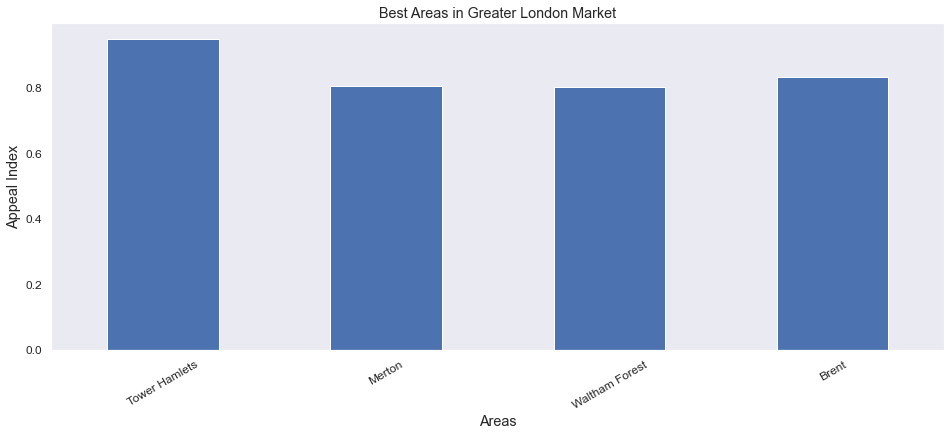

In [23]:
p = WinningAreas.plot(x='Area_name', y='Area_Appeal_Index',kind='bar',figsize = (16,6),title='Best Areas in Greater London Market',legend=False,grid=False, \
                 xlabel='Areas', ylabel='Appeal Index',rot=30,fontsize=12)